In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
# loadtxt() 이용해서 diabetes.csv 읽어들임

import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    x_data = loaded_data[ :, 0:-1]
    t_data = loaded_data[ :, [-1]]

    print(x_data.shape, t_data.shape)

except Exception as err:

    print(str(err))

(759, 8) (759, 1)


In [4]:
# Deep Learning 을 keras 이용하여 생성

model = Sequential()

# 노드 8개인 은닉층 생성
model.add(Dense(8, activation='sigmoid', input_shape=(8,)))

model.add(Dense(1, activation='sigmoid'))

In [5]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [6]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
19/19 - 4s - loss: 0.7156 - accuracy: 0.3789 - val_loss: 0.7034 - val_accuracy: 0.4276 - 4s/epoch - 185ms/step
Epoch 2/500
19/19 - 0s - loss: 0.6987 - accuracy: 0.5124 - val_loss: 0.6895 - val_accuracy: 0.5329 - 235ms/epoch - 12ms/step
Epoch 3/500
19/19 - 0s - loss: 0.6860 - accuracy: 0.5502 - val_loss: 0.6790 - val_accuracy: 0.6316 - 126ms/epoch - 7ms/step
Epoch 4/500
19/19 - 0s - loss: 0.6763 - accuracy: 0.6178 - val_loss: 0.6713 - val_accuracy: 0.6184 - 91ms/epoch - 5ms/step
Epoch 5/500
19/19 - 0s - loss: 0.6690 - accuracy: 0.6474 - val_loss: 0.6654 - val_accuracy: 0.6447 - 78ms/epoch - 4ms/step
Epoch 6/500
19/19 - 0s - loss: 0.6635 - accuracy: 0.6540 - val_loss: 0.6610 - val_accuracy: 0.6447 - 84ms/epoch - 4ms/step
Epoch 7/500
19/19 - 0s - loss: 0.6592 - accuracy: 0.6557 - val_loss: 0.6576 - val_accuracy: 0.6447 - 82ms/epoch - 4ms/step
Epoch 8/500
19/19 - 0s - loss: 0.6560 - accuracy: 0.6557 - val_loss: 0.6551 - val_accuracy: 0.6447 - 81ms/epoch - 4ms/step
Epoch 9/500
1

In [7]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7734


[0.5062009692192078, 0.7733860611915588]

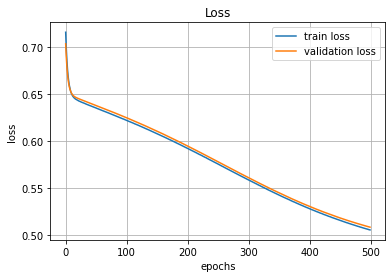

In [8]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

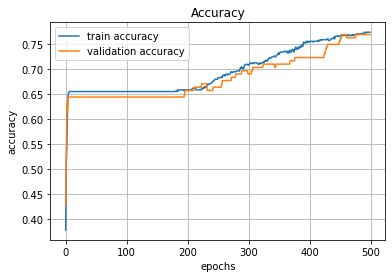

In [9]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()